In [1]:
import torch

In [95]:
# globalna pamięć
N=96
M=20*20*N
# ilość macierzy
# zakres dla macierzy
rank_min=5
rank_max=25

In [96]:
def get_rank_allocation(w,rank_min, memory_size):
   N=len(w)
   return torch.sqrt(rank_min**2+(memory_size-N*rank_min**2)*torch.softmax(w,dim=0))

In [97]:
# funkcja która alokuje pamięć w zależności od parametrów $w$ 
# potencjalnie może przekroczyć zakres rank_max, ale to nam nie szkodzi

def memory_allocation(w,rank_min):
    N=len(w)
    return rank_min**2+(M-N*rank_min**2)*torch.softmax(w,dim=0)

def rank_allocation(w,rank_min):
    N=len(w)
    return torch.sqrt(rank_min**2+(M-N*rank_min**2)*torch.softmax(w,dim=0))


In [98]:
import matplotlib.pyplot as plt

<BarContainer object of 96 artists>

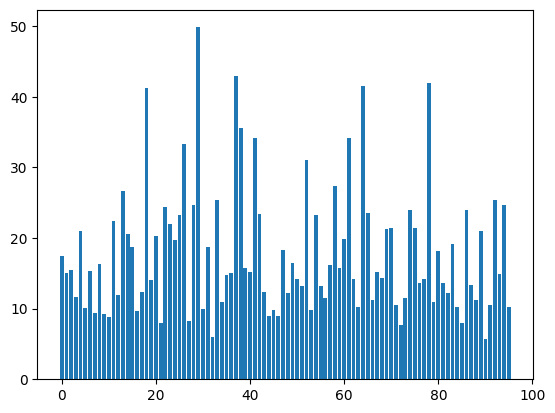

In [99]:
w=torch.randn(N)
# print(w)
# print(get_rank_allocation(w, rank_min, M))
plt.bar(range(N),get_rank_allocation(w,rank_min, M)) # mank_allocation(w,rank_min)

### Uniform (equal) initialization

<BarContainer object of 96 artists>

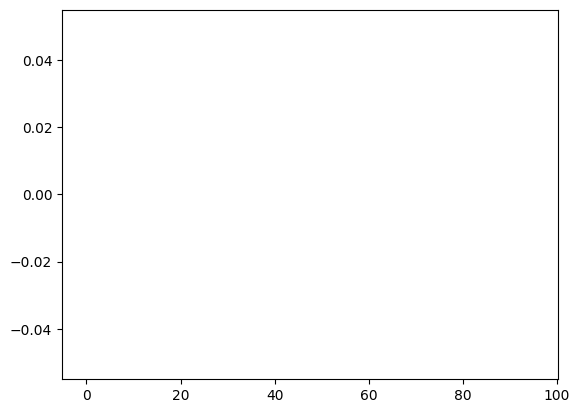

In [114]:
import torch

n = 96  # Number of points
tensor = torch.zeros((n))
plt.bar(range(n), tensor)

<BarContainer object of 96 artists>

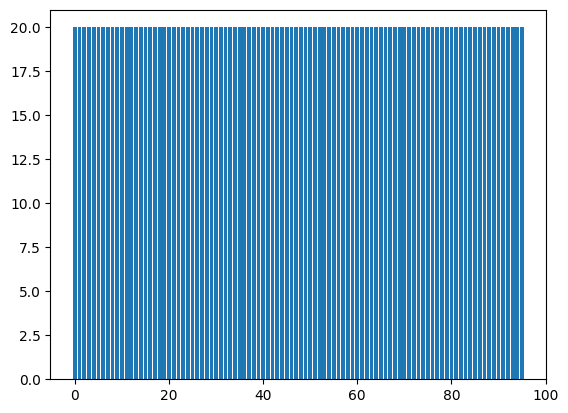

In [115]:
plt.bar(range(N),get_rank_allocation(tensor,rank_min, M)) # mank_allocation(w,rank_min)

### Normal (quadratic) initialization

<BarContainer object of 96 artists>

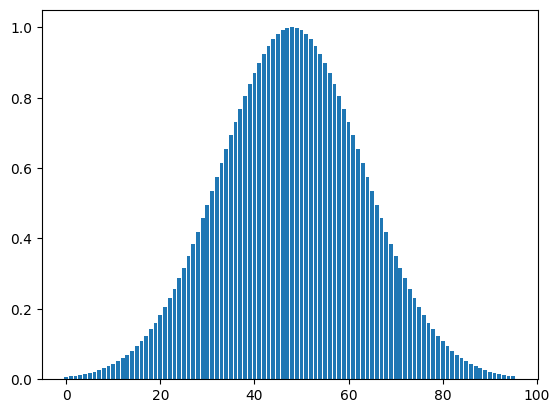

In [110]:
import torch

n = 96  # Number of points
center = n // 2  # Center of the distribution (mean)
sigma = n / (2 * (10) ** 0.5)

# Generate evenly spaced points
x = torch.linspace(0, n - 1, steps=n)
# Compute Gaussian function
tensor = torch.exp(-((x - center) ** 2) / (2 * sigma ** 2))
plt.bar(range(n), tensor)

<BarContainer object of 96 artists>

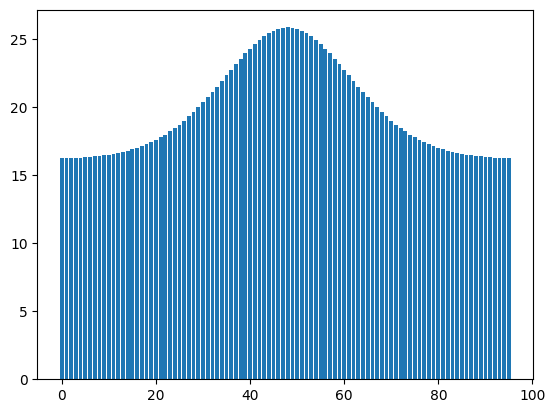

In [111]:
plt.bar(range(N),get_rank_allocation(tensor,rank_min, M)) # mank_allocation(w,rank_min)

### Skewed (3/4) initialization

tensor([0.0067, 0.0077, 0.0089, 0.0101, 0.0116, 0.0132, 0.0150, 0.0170, 0.0192,
        0.0218, 0.0245, 0.0276, 0.0310, 0.0348, 0.0390, 0.0436, 0.0486, 0.0541,
        0.0601, 0.0666, 0.0737, 0.0814, 0.0897, 0.0987, 0.1084, 0.1188, 0.1299,
        0.1418, 0.1545, 0.1681, 0.1824, 0.1976, 0.2137, 0.2306, 0.2484, 0.2670,
        0.2865, 0.3068, 0.3279, 0.3498, 0.3724, 0.3958, 0.4198, 0.4443, 0.4695,
        0.4950, 0.5210, 0.5473, 0.5738, 0.6004, 0.6270, 0.6535, 0.6799, 0.7060,
        0.7316, 0.7567, 0.7812, 0.8049, 0.8278, 0.8496, 0.8703, 0.8898, 0.9081,
        0.9248, 0.9401, 0.9538, 0.9659, 0.9762, 0.9847, 0.9914, 0.9961, 0.9990,
        1.0000, 0.9914, 0.9659, 0.9248, 0.8703, 0.8049, 0.7316, 0.6535, 0.5738,
        0.4950, 0.4198, 0.3498, 0.2865, 0.2306, 0.1824, 0.1418, 0.1084, 0.0814,
        0.0601, 0.0436, 0.0310, 0.0218, 0.0150, 0.0101])


<BarContainer object of 96 artists>

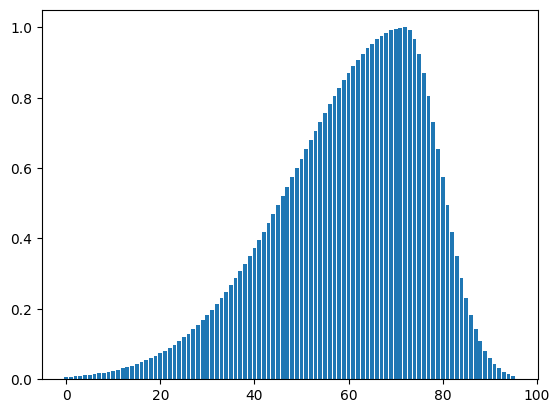

In [112]:
import torch

n = 96  # Number of points
center = 3 * n // 4  # Center the peak at 3/4n
sigma_left = 3*n / (4 * (10) ** 0.5)  # Standard deviation for the left side
sigma_right = 1*n / (4 * (10) ** 0.5)  # Standard deviation for the right side

# Generate evenly spaced points
x = torch.linspace(0, n - 1, steps=n)

# Compute left-skewed distribution
tensor = torch.where(
    x <= center,  # Left side (skewed tail)
    torch.exp(-((x - center) ** 2) / (2 * sigma_left ** 2)),
    torch.exp(-((x - center) ** 2) / (2 * sigma_right ** 2))  # Right side
)

print(tensor)


plt.bar(range(n), tensor)

<BarContainer object of 96 artists>

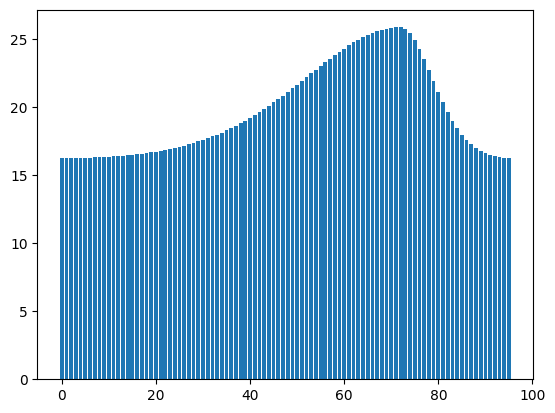

In [113]:
plt.bar(range(N),get_rank_allocation(tensor,rank_min, M)) # mank_allocation(w,rank_min)

In [5]:
import torch
import matplotlib.pyplot as plt

def matrix_mask(p, rank_min, rank_max, A):
    # Rozmiar macierzy A
    N = A.size(0)  # Zakładamy, że A jest macierzą NxN

    # Inicjalizacja macierzy wynikowej
    MA = torch.zeros(N, N)

    # Generowanie i sumowanie masek
    for i in range(rank_min, rank_max+1):  # Zakres od rank_min do rank_max (włącznie)
        tensor = torch.zeros(N, N)
        tensor[:i, :i] = 1  # Maska KxK dla aktualnego i
        MA += p[i - rank_min] *  tensor
    
    return MA

def visualize_matrix(matrix, title="Matrix Visualization"):
    plt.figure(figsize=(6, 6))
    # Ustawienie zakresu wartości vmin=0 (biały), vmax=max(matrix) (czarny)
    plt.imshow(matrix, cmap="gray_r", interpolation="none", vmin=0, vmax=matrix.max())
    plt.colorbar(label="Value")

    # Ustawienia etykiet osi
    num_rows, num_cols = matrix.shape
    plt.xticks(ticks=range(num_cols), labels=range(num_cols))
    plt.yticks(ticks=range(num_rows), labels=range(num_rows))
    
    plt.title(title)
    plt.xlabel("Columns (Index)")
    plt.ylabel("Rows (Index)")
    plt.show()



tensor([0.7813, 0.0780, 0.1406])


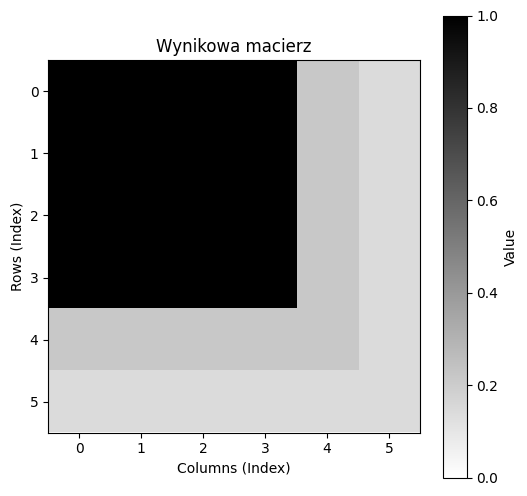

In [6]:
# Przykład użycia
rank_min = 4
rank_max = 6
p=torch.softmax(torch.randn(rank_max-rank_min+1),dim=0)
print(p)

A = torch.ones(rank_max, rank_max)  

# Obliczenie wynikowej macierzy
result = matrix_mask(p, rank_min, rank_max, A)

# Wizualizacja macierzy
visualize_matrix(result.numpy(), title="Wynikowa macierz")


In [7]:
# s to jest parametr
# alfa - przemnazamy wejscie, tau ile gumbela dodajemy, na raize domyślne=0
def prob_dist(s,rank_min,rank_max,alfa,tau=0):
    logits=-alfa*torch.log(1+(s-torch.arange(rank_min,rank_max+1))**2)
    gumbel_dist = torch.distributions.Gumbel(0,1)
    gumbel_vector = gumbel_dist.sample((rank_max+1-rank_min,))
    
    return torch.softmax(logits+tau*gumbel_vector,dim=0)

142600.0

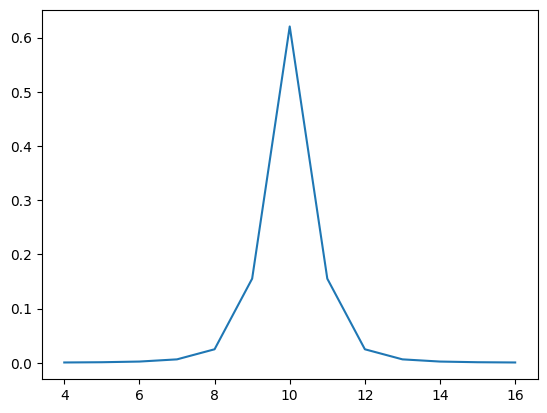

In [26]:
import numpy as np
# Przykład użycia
rank_min = 4
rank_max = 16
s=10
alfa=2
plt.plot(np.arange(rank_min,rank_max+1),prob_dist(s,rank_min,rank_max,alfa).numpy())
plt.show()

In [12]:
def matrix_soft(s, rank_min, rank_max, alfa,tau=0):
    A = torch.ones(rank_max, rank_max)  
    p=prob_dist(s,rank_min,rank_max,alfa,tau)
    return(matrix_mask(p, rank_min, rank_max, A))

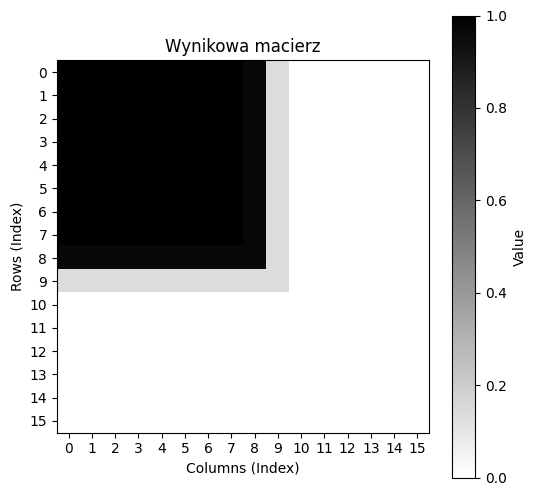

In [21]:
# Obliczenie wynikowej macierzy
# Przykład użycia
rank_min = 4
rank_max = 16
s=9.2

# sterujemy parametrami, jak duże alfa (typu 5), model się dyskretyzuje
# jak alfa=0.1, mamy rozbicie na całą przestrzeń 

#alfa=5
alfa=4

result = matrix_soft(s, rank_min, rank_max, alfa)

# Wizualizacja macierzy
visualize_matrix(result.numpy(), title="Wynikowa macierz")